# LoRa Data Analysis - Sample project


We first declare a fixed parameters.
Thos parameters are not changed during the experiments.

Fixed communication parameters are listed below:
- Code Rate: 4/5
- Frequency: 866.1 MHz
- Bandwidth: 125 kHz

Initial declaration

In [78]:
%matplotlib inline
import pandas as pd # import pandas
import numpy as np # import numpy
import matplotlib.pyplot as plt # import plotting module
import statistics
from IPython.display import set_matplotlib_formats # module for svg export

set_matplotlib_formats('svg') # set export to svg file
cut_ratio = 0.05 # Values below 5% of mean value are simply cut from charts to make it more readable

## Analysis of uplink messages

We read a csv file with uplink messages

In [105]:
uplink_data = pd.read_csv('uplink_messages.csv', delimiter=',')

Let us have a look at various columns that are present and can be evaluated.

In [80]:
uplink_data.head()

,id,app_data,snr,rssi,duty_cycle_remaining,is_primary,receive_time,seq,frequency,spf,power,airtime,coderate,bandwidth,msg_group_number,message_type_id,ap_id,node_id
0,1,MTMxLDEwMA==,8.71,-91.2,34922,t,2020-05-03 20:43:41.059,1,866100000,7,13,46,4/5,125000,0,1,111111,pjdQ
1,2,OTgsMTAw,9.53,-45.4,35059,t,2020-05-03 20:43:46.054,1,866100000,7,13,40,4/5,125000,0,1,111111,LteR
2,3,MTI2LDEwMA==,11.58,-73.5,34922,t,2020-05-03 20:43:51.63,1,866100000,7,13,46,4/5,125000,0,1,111111,3HGr
3,4,NTEsMTAw,8.27,-102.1,34198,t,2020-05-03 20:44:12.303,1,866900000,12,15,901,4/5,125000,0,2,111111,TOxm
4,5,ODMsMTAw,8.73,-79.2,34198,t,2020-05-03 20:44:22.876,1,866100000,12,15,901,4/5,125000,0,1,111111,JJ5v


Remove all columns that have fixed values or there is no point in their analysis.

In [106]:
try:
    del uplink_data['id']
    del uplink_data['msg_group_number']
    del uplink_data['is_primary']
    del uplink_data['message_type_id']
    del uplink_data['coderate']
    del uplink_data['bandwidth']
    del uplink_data['receive_time']
except KeyError:
    print('Columns have already been removed')

Let us have a look for different values to get an overview of overall values of different network parameters.

In [107]:
uplink_data.describe()

,snr,rssi,duty_cycle_remaining,seq,frequency,spf,power,airtime,ap_id
count,12665.000000,12665.000000,12665.000000,12665.000000,1.266500e+04,12665.000000,12665.000000,12665.000000,12665.000000
mean,9.208141,-75.573841,34308.999289,40.810028,8.664443e+08,9.356652,10.308646,443.929333,111112.659534
std,1.525215,23.199354,1821.672572,42.732393,3.961123e+05,2.353812,4.608115,445.250950,0.684634
min,6.500000,-114.900000,24271.000000,1.000000,8.661000e+08,7.000000,5.000000,40.000000,111111.000000
25%,7.890000,-95.600000,33723.000000,7.000000,8.661000e+08,7.000000,6.000000,46.000000,111112.000000
50%,9.190000,-76.700000,34750.000000,16.000000,8.661000e+08,8.000000,13.000000,82.000000,111113.000000
75%,10.590000,-54.700000,35634.000000,74.000000,8.669000e+08,12.000000,15.000000,901.000000,111113.000000
max,11.750000,-35.000000,35960.000000,139.000000,8.669000e+08,12.000000,15.000000,1032.000000,111114.000000


Create a new column 'arm'. This columns represents a combination of SF and TP and is referred in multi-armed bandit terminology as arm.

In [108]:
uplink_data['arm'] = 'S' + uplink_data.spf.astype(str) + 'P' + uplink_data.power.astype(str)

### Communication parameters selection

In [109]:
arms = uplink_data.arm.value_counts()
threshold = statistics.mean(uplink_data.arm.value_counts()) * cut_ratio
print(f'Values below {threshold} will be cut in a plot')

Values below 33.328947368421055 will be cut in a plot


In [85]:
arms = arms[arms > threshold]
arms

S12P15    5477
S7P6      3522
S8P5      1978
S7P14      507
S7P5       394
S7P7       369
S7P13      250
S10P15      48
S9P15       34
Name: arm, dtype: int64

Text(0, 0.5, 'Number of Messages')

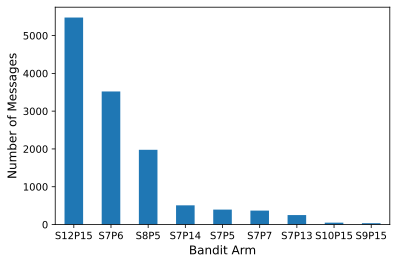

In [86]:
# set_matplotlib_formats('svg')
hist = arms.plot(kind='bar',rot=0)
hist.set_xlabel("Bandit Arm",fontsize=12)
hist.set_ylabel("Number of Messages",fontsize=12)

Export plot to SVG.

In [87]:
fig = hist.get_figure()
fig.savefig('adr-bandit-arms.svg')

### Duty cycle values

In [88]:
uplink_data.duty_cycle_remaining.describe()

count    12665.000000
mean     34308.999289
std       1821.672572
min      24271.000000
25%      33723.000000
50%      34750.000000
75%      35634.000000
max      35960.000000
Name: duty_cycle_remaining, dtype: float64

### Spreading Factor

Text(0, 0.5, 'Number of Messages')

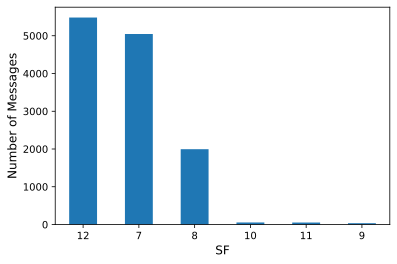

In [89]:
hist = uplink_data.spf.value_counts().plot(kind='bar',rot=0)
hist.set_xlabel("SF",fontsize=12)
hist.set_ylabel("Number of Messages",fontsize=12)

### Využitie frekvenčného pásma

We need to edit values.

In [91]:
uplink_frequency = uplink_data.frequency / 1000000

Text(0, 0.5, 'Number of Messages')

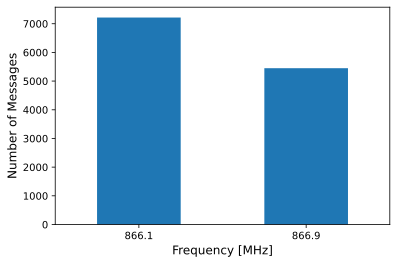

In [93]:
hist = uplink_frequency.value_counts().plot(kind='bar',rot=0)
hist.set_xlabel("Frequency [MHz]",fontsize=12)
hist.set_ylabel("Number of Messages",fontsize=12)

### Utilization of different LoRa Access Points

Text(0, 0.5, 'Number of Messages')

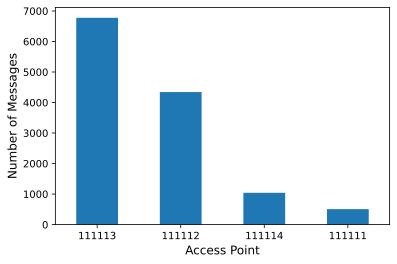

In [95]:
hist = uplink_data.ap_id.value_counts().plot(kind='bar',rot=0)
hist.set_xlabel('Access Point',fontsize=12)
hist.set_ylabel('Number of Messages',fontsize=12)

### Duration of Data Transmission

Text(0, 0.5, 'Number of Messages')

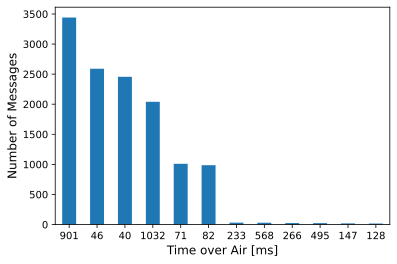

In [97]:
hist = uplink_data.airtime.value_counts().plot(kind="bar",rot=0)
hist.set_xlabel("Time over Air [ms]",fontsize=12)
hist.set_ylabel("Number of Messages",fontsize=12)

### Transmission Power

Text(0, 0.5, 'Number of Messages')

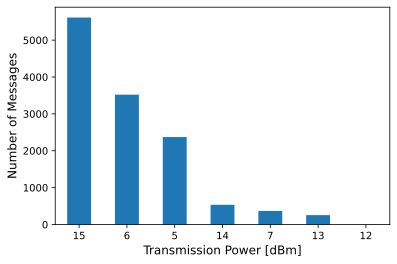

In [132]:
hist = uplink_data.power.value_counts().plot(kind="bar",rot=0)
hist.set_xlabel("Transmission Power [dBm]",fontsize=12)
hist.set_ylabel("Number of Messages",fontsize=12)

### Analysis of End Nodes

In [110]:
uplink_data.node_id.describe()

count     12665
unique      232
top        lNfY
freq        139
Name: node_id, dtype: object

In [122]:
unique_ens = len(uplink_data.node_id.unique())
unique_aps = len(uplink_data.ap_id.unique())

In [123]:
print(f'Total number of connected end devices: {unique_ens}')
print(f'Total number of connected access points: {unique_aps}')

Total number of connected end devices: 232
Total number of connected access points: 4


## Downlink Messages

In [127]:
downlink_data = pd.read_csv('downlink_messages.csv', delimiter=',')

In [128]:
downlink_data.head()

,id,app_data,net_data,duty_cycle_remaining,sent,ack_required,delivered,send_time,frequency,spf,power,airtime,coderate,bandwidth,ap_id,node_id
0,1,NaN,"[{""sf"":10,""power"":15,""type"":""NORMAL""}]",35005,t,f,t,2020-05-03 20:43:46.063,866100000,7,15,40,4/5,125000,111111,LteR
1,2,NaN,"[{""sf"":11,""power"":15,""type"":""NORMAL""}]",34868,t,f,t,2020-05-03 20:43:51.637,866100000,7,15,46,4/5,125000,111111,3HGr
2,3,NaN,[],33608,t,f,t,2020-05-03 20:44:12.309,866900000,12,15,901,4/5,125000,111111,TOxm
3,4,NaN,"[{""sf"":10,""power"":15,""type"":""NORMAL""}]",33280,t,f,t,2020-05-03 20:44:22.884,866100000,12,15,901,4/5,125000,111111,JJ5v
4,5,NaN,"[{""sf"":11,""power"":14,""type"":""NORMAL""}]",33149,t,f,t,2020-05-03 20:44:39.591,866100000,12,14,1032,4/5,125000,111111,ZFT1


### Utilization of LoRa Access Points

Text(0, 0.5, 'Number of Messages')

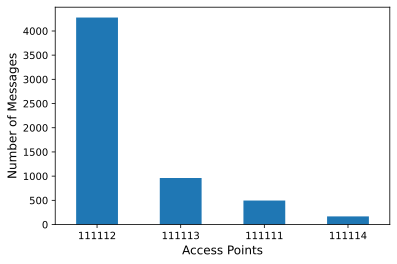

In [130]:
hist = downlink_data.ap_id.value_counts().plot(kind='bar',rot=0)
hist.set_xlabel("Access Points",fontsize=12)
hist.set_ylabel("Number of Messages",fontsize=12)

### Duty cycle correction

In [124]:
downlink_data.duty_cycle_remaining.describe()

NameError: name 'downlink_data' is not defined

### Spreading Factor (Faktor šírenia)

Text(0, 0.5, 'Počet správ')

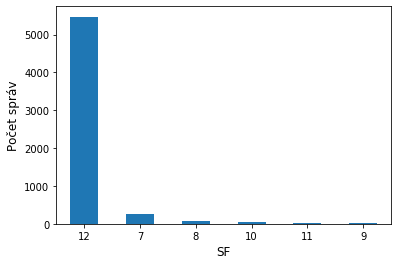

In [26]:
hist = downlink_data.spf.value_counts().plot(kind='bar',rot=0)
hist.set_xlabel("SF",fontsize=12)
hist.set_ylabel("Počet správ",fontsize=12)

### Využitie frekvenčného pásma

Text(0, 0.5, 'Počet správ')

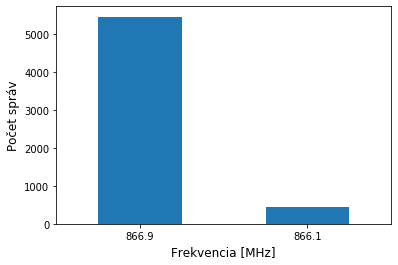

In [27]:
downlink_frequency = downlink_data.frequency / 1000000
hist = downlink_frequency.value_counts().plot(kind='bar',rot=0)
hist.set_xlabel("Frekvencia [MHz]",fontsize=12)
hist.set_ylabel("Počet správ",fontsize=12)

### Vysielací výkon (Power)

Text(0, 0.5, 'Počet správ')

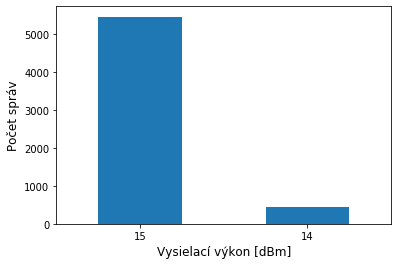

In [28]:
hist = downlink_data.power.value_counts().plot(kind="bar",rot=0)
hist.set_xlabel("Vysielací výkon [dBm]",fontsize=12)
hist.set_ylabel("Počet správ",fontsize=12)

### Trvanie prenosu

Text(0, 0.5, 'Počet správ')

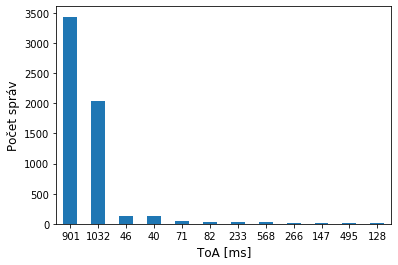

In [29]:
hist = downlink_data.airtime.value_counts().plot(kind="bar",rot=0)
hist.set_xlabel("ToA [ms]",fontsize=12)
hist.set_ylabel("Počet správ",fontsize=12)

## Koncové zariadenia

Analýza činnosti koncových zariadení

### 50 pripojených zariadení

In [31]:
end_nodes = pd.read_csv('end_nodes_50.csv', delimiter=',')

In [32]:
end_nodes.head()

,dev_id,active_time,uptime,collisions
0,8utX,13.17,2881.36,0
1,tztI,13.72,2884.01,0
2,iU1v,11.44,2947.28,0
3,muIF,11.88,2888.77,0
4,Vs4q,14.59,2908.10,0


### Histogram kolízií

Text(0, 0.5, 'Počet správ')

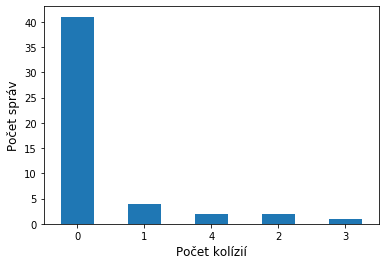

In [33]:
hist = end_nodes.collisions.value_counts().plot(kind='bar',rot=0)
hist.set_xlabel("Počet kolízií",fontsize=12)
hist.set_ylabel("Počet správ",fontsize=12)

### 50 pripojených zariadení

In [31]:
end_nodes = pd.read_csv('end_nodes_50.csv', delimiter=',')

In [32]:
end_nodes.head()

,dev_id,active_time,uptime,collisions
0,8utX,13.17,2881.36,0
1,tztI,13.72,2884.01,0
2,iU1v,11.44,2947.28,0
3,muIF,11.88,2888.77,0
4,Vs4q,14.59,2908.10,0


### Histogram kolízií

Text(0, 0.5, 'Počet správ')

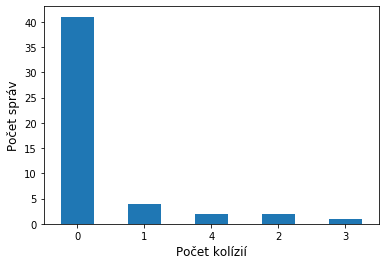

In [33]:
hist = end_nodes.collisions.value_counts().plot(kind='bar',rot=0)
hist.set_xlabel("Počet kolízií",fontsize=12)
hist.set_ylabel("Počet správ",fontsize=12)

In [34]:
end_nodes.describe()

,active_time,uptime,collisions
count,50.000000,50.000000,50.000000
mean,183.875400,2896.488800,0.380000
std,428.944655,36.238597,0.966585
min,7.740000,2841.000000,0.000000
25%,11.365000,2864.095000,0.000000
50%,12.610000,2897.225000,0.000000
75%,14.550000,2929.717500,0.000000
max,1931.950000,2952.990000,4.000000


### 252 pripojených zariadení

In [36]:
end_nodes = pd.read_csv('end_nodes_252.csv', delimiter=',')

In [37]:
end_nodes.head()

,dev_id,active_time,uptime,collisions
0,TIWJ,1010.06,724.59,0
1,rygh,799.88,4217.27,3
2,zhnh,610.94,4298.68,6
3,WLhc,392.19,391.13,0
4,1S5D,1778.56,6856.27,2


### Histogram kolízií

Text(0, 0.5, 'Počet správ')

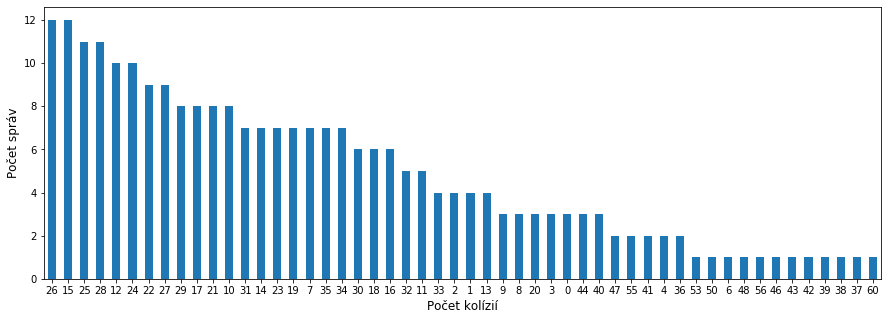

In [43]:
hist = end_nodes.collisions.value_counts().plot(kind='bar',figsize=(15,5),rot=0)
hist.set_xlabel("Počet kolízií",fontsize=12)
hist.set_ylabel("Počet správ",fontsize=12)

In [44]:
end_nodes.describe()

,active_time,uptime,collisions
count,252.000000,252.000000,252.000000
mean,842.666825,16728.879762,22.555556
std,1034.851563,5858.448500,11.597194
min,1.160000,391.130000,0.000000
25%,59.947500,19186.845000,14.000000
50%,548.975000,19475.850000,23.000000
75%,1211.742500,19674.772500,29.000000
max,6723.080000,19838.880000,60.000000


### 305 pripojených zariadení

In [24]:
end_nodes = pd.read_csv('end_nodes_305.csv', delimiter=',')

In [25]:
end_nodes.head()

,dev_id,active_time,uptime,collisions
0,AV9T,1.87,3782.17,1
1,7dbm,86.49,965.11,4
2,oZ1G,3826.96,1249.99,16
3,OBzA,3.38,3787.47,0
4,n587,619.89,1536.05,1


### Histogram kolízií

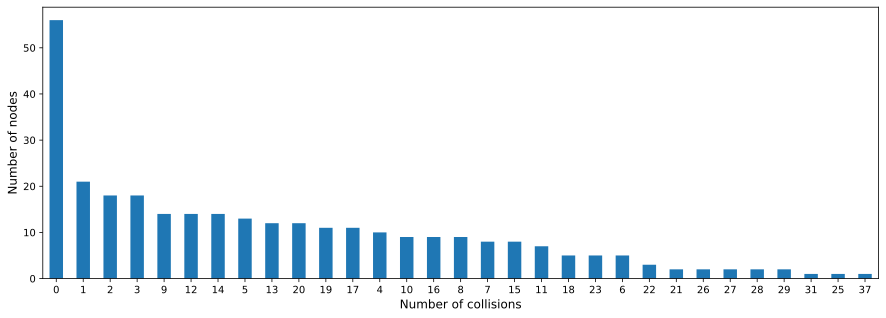

In [32]:
hist = end_nodes.collisions.value_counts().plot(kind='bar',figsize=(15,5),rot=0)
hist.set_xlabel("Number of collisions",fontsize=12)
hist.set_ylabel("Number of nodes",fontsize=12)
fig = hist.get_figure()
fig.savefig('adr-collisions-305.svg')

In [50]:
end_nodes.describe()

,active_time,uptime,collisions
count,305.000000,305.000000,305.000000
mean,499.813213,3149.963049,8.895082
std,972.667626,580.550126,7.924945
min,1.420000,965.110000,0.000000
25%,6.160000,2859.030000,1.000000
50%,22.420000,3305.840000,8.000000
75%,547.640000,3585.370000,15.000000
max,8309.560000,3800.470000,37.000000


In [53]:
energy = end_nodes.active_time / end_nodes.uptime

In [54]:
energy.describe()

count    305.000000
mean       0.193238
std        0.399918
min        0.000385
25%        0.001740
50%        0.007144
75%        0.190170
max        3.061592
dtype: float64